<a href="https://colab.research.google.com/github/novitangrn/stock-prediction-STACN/blob/main/Notebook/%5B3%5D_Draft_Text_Processsing_%5BComplete_Data%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data by Sektor

In [ ]:
df_cnbc = pd.read_excel('/content/drive/MyDrive/Skripsi/Data Berita Fix/new_all_completed_data_cnbc.xlsx')
df_kontan = pd.read_excel('/content/drive/MyDrive/Skripsi/Data Berita Fix/new_all_completed_data_kontan.xlsx')


In [ ]:
print(df_cnbc.info())
print(df_kontan.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47531 entries, 0 to 47530
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             47531 non-null  object        
 1   Link              47531 non-null  object        
 2   Date              47531 non-null  datetime64[ns]
 3   Content           47531 non-null  object        
 4   Title_Translated  47531 non-null  object        
 5   Sektor            47531 non-null  object        
 6   Matched Keywords  47531 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75074 entries, 0 to 75073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Judul             75074 non-null  object        
 1   Tanggal           75074 non-null  datetime64[ns]
 2   Title_Transla

In [ ]:
df_cnbc["Sektor"].value_counts()

Sektor
G                13938
All Sector        7939
Internasional     5780
A                 3707
B                 3279
J                 2065
D                 1934
H                 1873
E                 1478
I                 1453
Unknown           1107
K                  941
Obligasi           695
F                  692
C                  650
Name: count, dtype: int64

In [ ]:
df_kontan["Sektor"].value_counts()

Sektor
All Sector       17320
Unknown          13794
B                10010
A                 6092
Internasional     5456
G                 4655
J                 3755
D                 3712
E                 2454
H                 1854
C                 1576
I                 1527
F                 1288
Obligasi           845
K                  736
Name: count, dtype: int64

# Buat df Per Sektor

In [ ]:
sektor_list = df_cnbc["Sektor"].unique()
dict_cnbc = {}

for sektor in sektor_list:
  dict_cnbc[sektor] = df_cnbc[df_cnbc["Sektor"] == sektor]

In [ ]:
sektor_list = df_kontan["Sektor"].unique()
dict_kontan = {}

for sektor in sektor_list:
  dict_kontan[sektor] = df_kontan[df_kontan["Sektor"] == sektor]

In [ ]:
dict_cnbc.keys()

dict_keys(['Internasional', 'All Sector', 'B', 'D', 'F', 'G', 'A', 'J', 'I', 'Obligasi', 'Unknown', 'H', 'E', 'C', 'K'])

In [ ]:
dict_kontan["A"] = dict_kontan["A"].sort_values(by="Tanggal")
dict_kontan["A"].to_excel("df_AA.xlsx")


In [ ]:
dict_cnbc["A"]

Title  \
22     Prospek 2021 Minyak Mentah Stabil Batu Bara La...   
27     Siapsiap Tahun 2021 Harga Komoditas Tambang Ba...   
36     Sempat Merah Ini Saham yang Bertarung Bikin IH...   
44     Selamat INDY Ikut Menang Tender Bareng CT Corp...   
56     AS Boikot Lagi Sawit Malaysia Anak Perusahaann...   
...                                                  ...   
47426  Donald Trump Buka Suara Harga Minyak Kompak Am...   
47440  Harga Minyak Belum Bisa Bangkit dari KuburMasi...   
47444  Investor Pelototi TandaTanda dari AS Harga Min...   
47508  Pasar Penuh Ketidakpastian Dolar Dibuka Mengua...   
47527  Ini Kata PLN Soal Pasar Karbon  PLTU Wajib Bel...   

                                                    Link                Date  \
22     https://www.cnbcindonesia.com/market/202101021... 2021-01-02 17:05:00   
27     https://www.cnbcindonesia.com/market/202101030... 2021-01-03 09:50:00   
36     https://www.cnbcindonesia.com/market/202101041... 2021-01-04 10:07:00   
44     https://www.cnbcindonesia.com/market/202101041... 2021-01-04 11:22:00   
56     https://www.cnbcindonesia.com/market/202101041... 2021-01-04 13:55:00   
...                                                  ...                 ...   
47426  https://www.cnbcindonesia.com/market/202501270... 2025-01-27 09:49:00   
47440  https://www.cnbcindonesia.com/market/202501281... 2025-01-28 13:45:00   
47444  https://www.cnbcindonesia.com/market/202501291... 2025-01-29 10:53:00   
47508  https://www.cnbcindonesia.com/market/202501310... 2025-01-31 09:15:00   
47527  https://www.cnbcindonesia.com/market/202501311... 2025-01-31 17:23:00   

                                                 Content  \
22     Jakarta, CNBC Indonesia- Harga komoditas seper...   
27     Jakarta, CNBC Indonesia -Babak baru tahun 2021...   
36     Jakarta, CNBC Indonesia- Indeks Harga Saham Ga...   
44     Jakarta, CNBC Indonesia -Anak usaha PT Indika ...   
56     Jakarta, CNBC Indonesia- Pemerintah Amerika Se...   
...                                                  ...   
47426  Jakarta, CNBC Indonesia -Harga minyak mentah d...   
47440  Jakarta, CNBC Indonesia -Harga minyak mentah d...   
47444  Jakarta, CNBC Indonesia -Harga minyak mentah d...   
47508  Jakarta, CNBC Indonesia -Nilai tukar rupiah te...   
47527  Jakarta, CNBC Indonesia- VP Transisi Energi da...   

                                        Title_Translated Sektor  \
22     2021 Outlook, Crude Oil Steady, Coal Continues...      A   
27     Get ready, in 2021 the price of mining commodi...      A   
36     Once Red, These Are the Stocks That Are Fighti...      A   
44     Congratulations! INDY Wins Tender with CT Corp...      A   
56     US Again Boycotts Malaysian Palm Oil, Its Subs...      A   
...                                                  ...    ...   
47426    Donald Trump Speaks Out, Oil Prices Collapse 1%      A   
47440  Oil Prices Still Can't Rise from the Grave - S...      A   
47444  Investors Eye Signs from US, Oil Prices Tend t...      A   
47508  Market Full of Uncertainty, Dollar Opens Stron...      A   
47527  This is What PLN Says About Carbon Market & PL...      A   

                                        Matched Keywords  
22                        ['minyak mentah', 'batu bara']  
27                                           ['tambang']  
36     ['INDY', 'ITMG', 'TLKM', 'ISAT', 'TLKM', 'ISAT...  
44                                              ['INDY']  
56     ['minyak', 'cpo', 'cpo', 'minyak sawit', 'miny...  
...                                                  ...  
47426                                         ['minyak']  
47440                                         ['minyak']  
47444                                         ['minyak']  
47508  ['minyak', 'gedung', 'bank', 'bunga', 'bunga',...  
47527                                      ['batu bara']  

[3707 rows x 7 columns]

# Hitung Jumlah Berita Per Sektor

In [ ]:
for sektor, df_sektor in dict_cnbc.items():
    print(f"Jumlah data di sektor {sektor}: {len(df_sektor)}")

Jumlah data di sektor Internasional: 5780
Jumlah data di sektor All Sector: 7939
Jumlah data di sektor B: 3279
Jumlah data di sektor D: 1934
Jumlah data di sektor F: 692
Jumlah data di sektor G: 13938
Jumlah data di sektor A: 3707
Jumlah data di sektor J: 2065
Jumlah data di sektor I: 1453
Jumlah data di sektor Obligasi: 695
Jumlah data di sektor Unknown: 1107
Jumlah data di sektor H: 1873
Jumlah data di sektor E: 1478
Jumlah data di sektor C: 650
Jumlah data di sektor K: 941


In [ ]:
for sektor, df_sektor in dict_kontan.items():
    print(f"Jumlah data di sektor {sektor}: {len(df_sektor)}")

Jumlah data di sektor A: 6092
Jumlah data di sektor Internasional: 5456
Jumlah data di sektor B: 10010
Jumlah data di sektor All Sector: 17320
Jumlah data di sektor Unknown: 13794
Jumlah data di sektor J: 3755
Jumlah data di sektor D: 3712
Jumlah data di sektor C: 1576
Jumlah data di sektor G: 4655
Jumlah data di sektor I: 1527
Jumlah data di sektor E: 2454
Jumlah data di sektor H: 1854
Jumlah data di sektor K: 736
Jumlah data di sektor F: 1288
Jumlah data di sektor Obligasi: 845


In [ ]:
dict_cnbc["G"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13938 entries, 16 to 47530
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             13938 non-null  object        
 1   Link              13938 non-null  object        
 2   Date              13938 non-null  datetime64[ns]
 3   Content           13938 non-null  object        
 4   Title_Translated  13938 non-null  object        
 5   Sektor            13938 non-null  object        
 6   Matched Keywords  13938 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 871.1+ KB


# Hitung Jumlah Berita per Hari

In [ ]:
df_cnbc["Only_Date"] = df_cnbc["Date"].dt.date
per_day_cnbc = df_cnbc["Only_Date"].value_counts().reset_index()
per_day_cnbc.columns = ["Date", "News Count"]
per_day_cnbc = per_day_cnbc.sort_values("Date")
per_day_cnbc = per_day_cnbc.reset_index(drop=True)

print(per_day_cnbc)
print("Total Berita:")
per_day_cnbc["News Count"].sum()

            Date  News Count
0     2021-01-01          15
1     2021-01-02          12
2     2021-01-03           6
3     2021-01-04          37
4     2021-01-05          35
...          ...         ...
1487  2025-01-27          14
1488  2025-01-28           8
1489  2025-01-29          12
1490  2025-01-30          43
1491  2025-01-31          33

[1492 rows x 2 columns]
Total Berita:


47531

In [ ]:
df_kontan["Only_Date"] = df_kontan["Tanggal"].dt.date
per_day_kontan = df_kontan["Only_Date"].value_counts().reset_index()
per_day_kontan.columns = ["Tanggal", "News Count"]
per_day_kontan = per_day_kontan.sort_values("Tanggal")
per_day_kontan = per_day_kontan.reset_index(drop=True)

print(per_day_kontan)
print("Total Berita:")
per_day_kontan["News Count"].sum()

         Tanggal  News Count
0     2021-01-25          55
1     2021-01-26          67
2     2021-01-27          72
3     2021-01-28          64
4     2021-01-29          56
...          ...         ...
1463  2025-01-27          34
1464  2025-01-28          28
1465  2025-01-29          32
1466  2025-01-30          53
1467  2025-01-31          58

[1468 rows x 2 columns]
Total Berita:


75074

In [ ]:
print(per_day_cnbc.describe())
print("-----------------------")
print(per_day_kontan.describe())

        News Count
count  1492.000000
mean     31.857239
std      14.637461
min       3.000000
25%      16.000000
50%      38.000000
75%      43.000000
max      98.000000
-----------------------
        News Count
count  1468.000000
mean     51.140327
std      23.486745
min       2.000000
25%      26.000000
50%      60.000000
75%      70.000000
max     102.000000


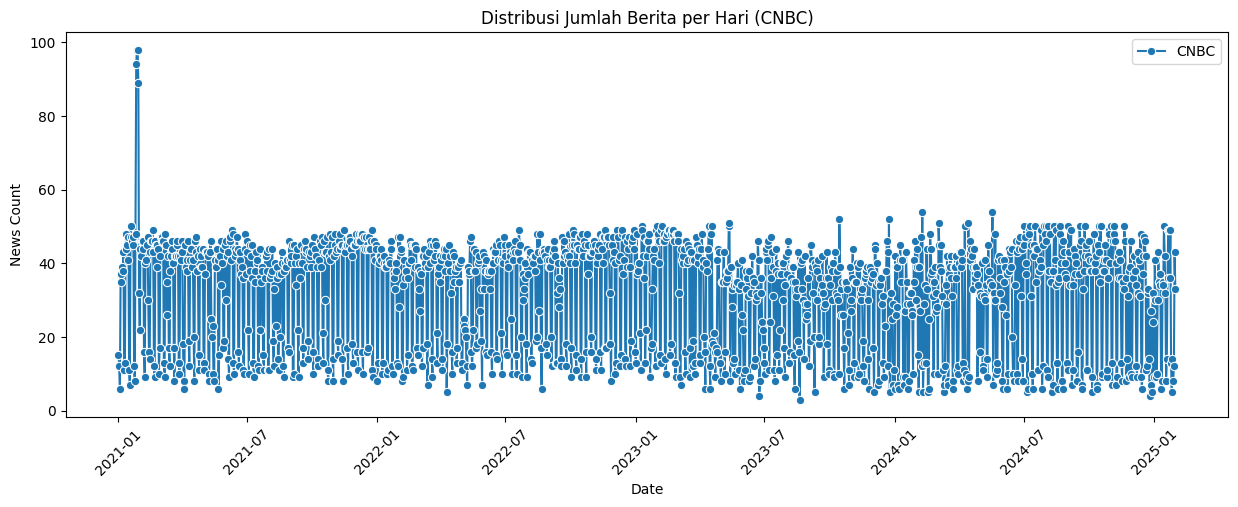

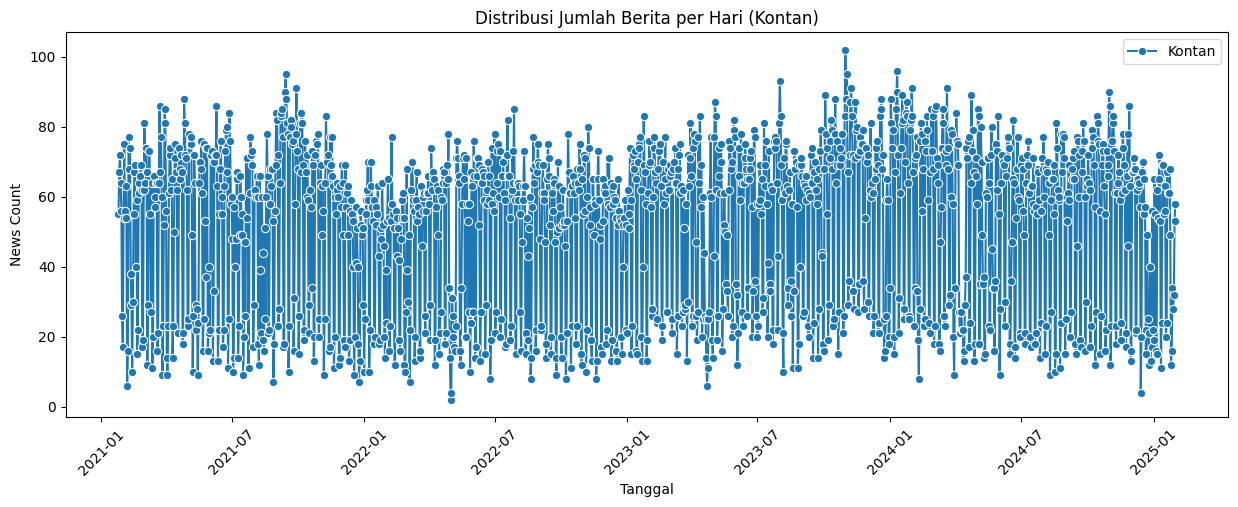

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi untuk per_day_cnbc
plt.figure(figsize=(15, 5))
sns.lineplot(data=per_day_cnbc, x="Date", y="News Count", marker="o", label="CNBC")
plt.xticks(rotation=45)
plt.title("Distribusi Jumlah Berita per Hari (CNBC)")
plt.show()

# Visualisasi untuk per_day_kontan
plt.figure(figsize=(15, 5))
sns.lineplot(data=per_day_kontan, x="Tanggal", y="News Count", marker="o", label="Kontan")
plt.xticks(rotation=45)
plt.title("Distribusi Jumlah Berita per Hari (Kontan)")
plt.show()

# Jumlah Berita Per Hari Setiap Sektor

In [ ]:
for sektor, df_sektor in dict_cnbc.items():
    # Menggunakan .copy() untuk membuat salinan DataFrame
    df_sektor_copy = df_sektor.copy()

    df_sektor_copy["Only_Date"] = df_sektor_copy["Date"].dt.date
    news_per_day = df_sektor_copy["Only_Date"].value_counts().reset_index()
    news_per_day.columns = ["Date", "News Count"]
    news_per_day = news_per_day.sort_values("Date")

    print(f"Distribusi berita CNBC sektor {sektor}:")
    print(news_per_day.head(), "\n")

Distribusi berita CNBC sektor Internasional:
            Date  News Count
422   2021-01-01           5
1029  2021-01-02           2
1231  2021-01-03           1
487   2021-01-04           5
489   2021-01-05           5 

Distribusi berita CNBC sektor All Sector:
            Date  News Count
504   2021-01-01           7
1114  2021-01-02           2
1185  2021-01-03           1
95    2021-01-04          12
167   2021-01-05          10 

Distribusi berita CNBC sektor B:
            Date  News Count
562   2021-01-01           2
1089  2021-01-02           1
346   2021-01-04           3
831   2021-01-06           2
332   2021-01-07           3 

Distribusi berita CNBC sektor D:
           Date  News Count
712  2021-01-01           1
104  2021-01-04           3
823  2021-01-05           1
190  2021-01-06           3
824  2021-01-07           1 

Distribusi berita CNBC sektor F:
           Date  News Count
280  2021-01-02           1
389  2021-01-03           1
352  2021-01-04           1
351 

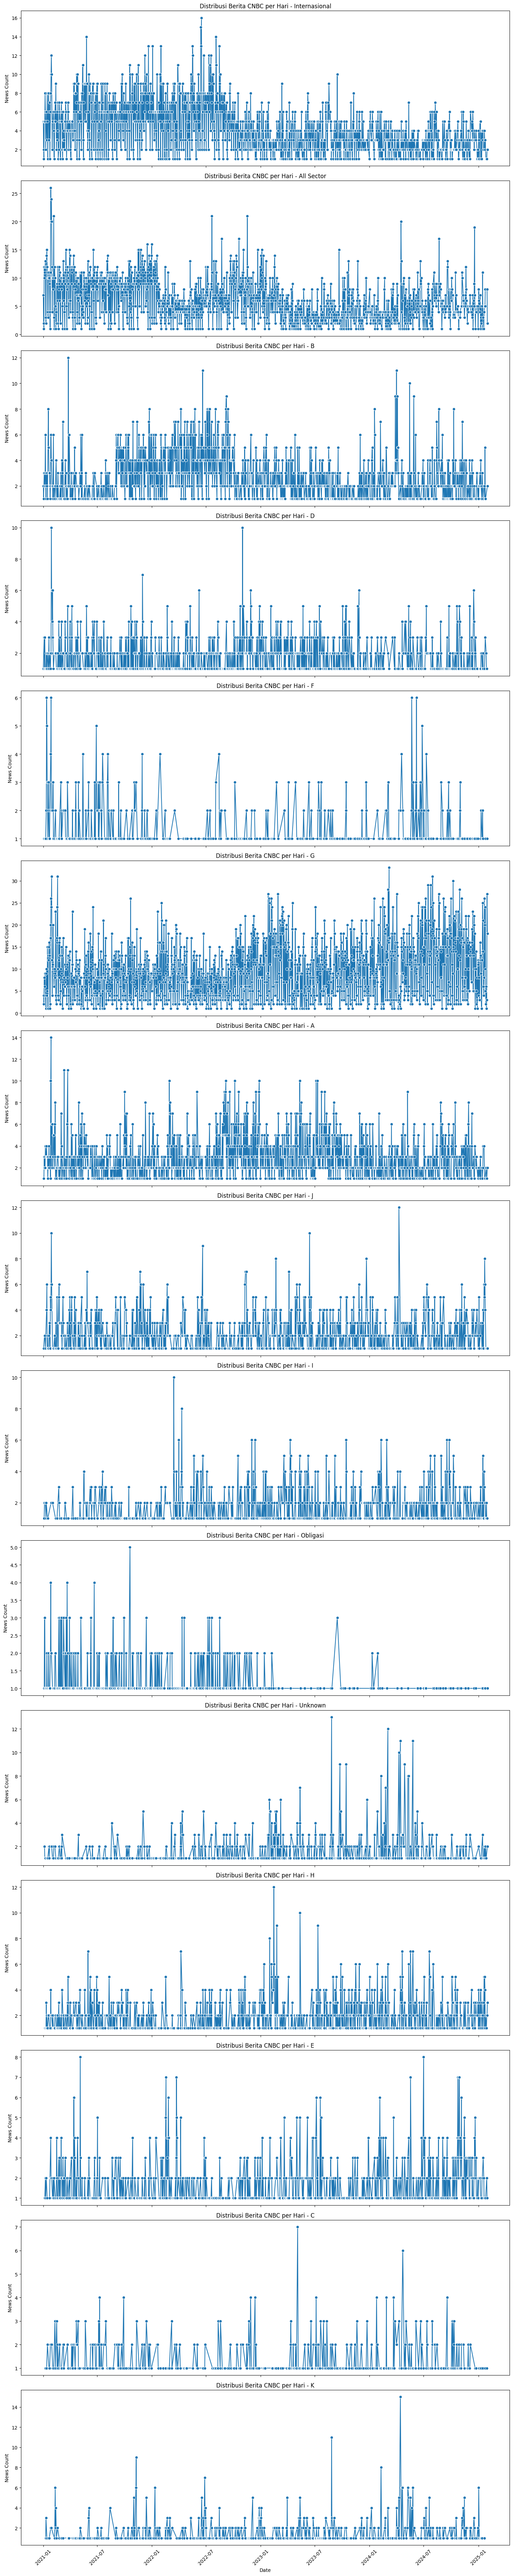

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_sectors = len(dict_cnbc)  # Hitung jumlah sektor
fig, axes = plt.subplots(num_sectors, 1, figsize=(15, 5 * num_sectors), sharex=True)  # Buat subplot

# Kalau cuma satu sektor, axes harus dijadikan list dulu
if num_sectors == 1:
    axes = [axes]

for ax, (sektor, df_sektor) in zip(axes, dict_cnbc.items()):
    # Menggunakan .copy() untuk membuat salinan DataFrame
    df_sektor_copy = df_sektor.copy()

    # Menggunakan .loc untuk mengubah salinan DataFrame
    df_sektor_copy.loc[:, "Only_Date"] = df_sektor_copy["Date"].dt.date  # Ambil tanggal saja

    news_per_day = df_sektor_copy["Only_Date"].value_counts().reset_index()
    news_per_day.columns = ["Date", "News Count"]
    news_per_day = news_per_day.sort_values("Date")

    sns.lineplot(data=news_per_day, x="Date", y="News Count", marker="o", ax=ax)
    ax.set_title(f"Distribusi Berita CNBC per Hari - {sektor}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
for sektor, df_sektor in dict_kontan.items():
    # Menggunakan .copy() untuk membuat salinan DataFrame
    df_sektor_copy = df_sektor.copy()

    df_sektor_copy["Only_Date"] = df_sektor_copy["Tanggal"].dt.date
    news_per_day = df_sektor_copy["Only_Date"].value_counts().reset_index()
    news_per_day.columns = ["Tanggal", "News Count"]
    news_per_day = news_per_day.sort_values("Tanggal")

    print(f"Distribusi berita Kontan sektor {sektor}:")
    print(news_per_day.head(), "\n")

Distribusi berita Kontan sektor A:
        Tanggal  News Count
861  2021-01-25           3
755  2021-01-26           4
770  2021-01-27           4
750  2021-01-28           4
976  2021-01-29           2 

Distribusi berita Kontan sektor Internasional:
         Tanggal  News Count
1032  2021-01-25           2
528   2021-01-26           4
467   2021-01-27           5
818   2021-01-28           3
356   2021-01-29           5 

Distribusi berita Kontan sektor B:
         Tanggal  News Count
197   2021-01-25          11
479   2021-01-26           8
858   2021-01-27           5
1008  2021-01-28           4
862   2021-01-29           5 

Distribusi berita Kontan sektor All Sector:
        Tanggal  News Count
271  2021-01-25          18
536  2021-01-26          15
214  2021-01-27          19
7    2021-01-28          26
42   2021-01-29          22 

Distribusi berita Kontan sektor Unknown:
        Tanggal  News Count
713  2021-01-25           9
319  2021-01-26          14
60   2021-01-27       

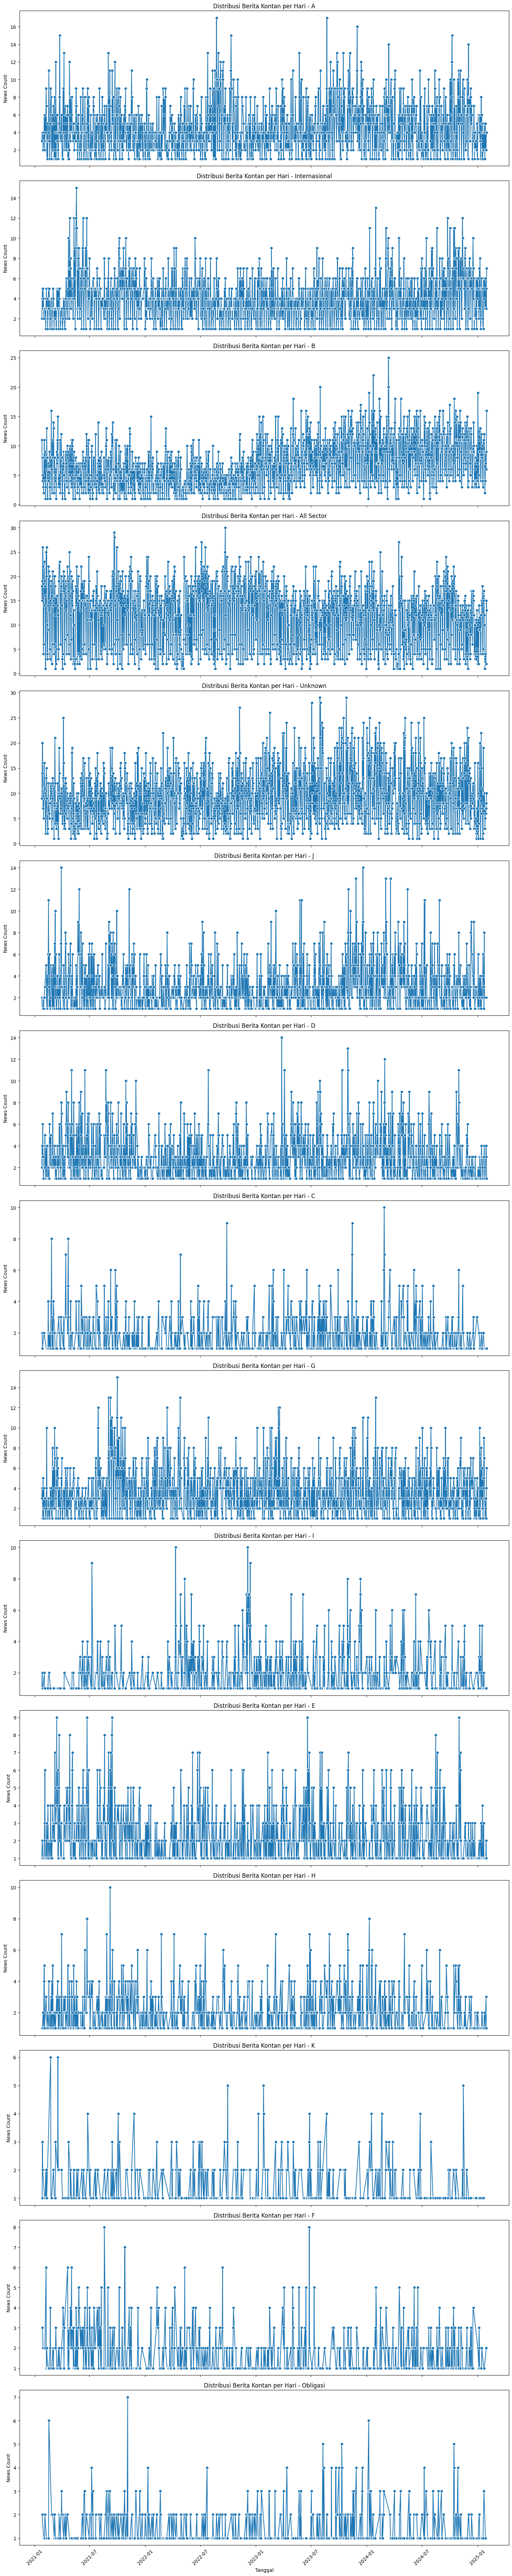

In [ ]:
num_sectors = len(dict_kontan)  # Hitung jumlah sektor
fig, axes = plt.subplots(num_sectors, 1, figsize=(15, 5 * num_sectors), sharex=True)  # Buat subplot

# Kalau cuma satu sektor, axes harus dijadikan list dulu
if num_sectors == 1:
    axes = [axes]

for ax, (sektor, df_sektor) in zip(axes, dict_kontan.items()):
    # Menggunakan .copy() untuk membuat salinan DataFrame
    df_sektor_copy = df_sektor.copy()

    # Menggunakan .loc untuk mengubah salinan DataFrame
    df_sektor_copy.loc[:, "Only_Date"] = df_sektor_copy["Tanggal"].dt.date  # Ambil tanggal saja

    news_per_day = df_sektor_copy["Only_Date"].value_counts().reset_index()
    news_per_day.columns = ["Tanggal", "News Count"]
    news_per_day = news_per_day.sort_values("Tanggal")

    sns.lineplot(data=news_per_day, x="Tanggal", y="News Count", marker="o", ax=ax)
    ax.set_title(f"Distribusi Berita Kontan per Hari - {sektor}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Mencari Hari Tanpa Berita

In [ ]:
# Buat rentang tanggal dari 1 Jan 2021 sampai 31 Des 2024
full_date_range = pd.date_range(start="2021-01-01", end="2024-12-31", freq="D")

# Ambil hanya tanggal (tanpa jam) dari kolom "Date" di DataFrame
df_cnbc["Only_Date"] = df_cnbc["Date"].dt.date

# Buat DataFrame dengan semua tanggal yang seharusnya ada
full_dates_df = pd.DataFrame(full_date_range, columns=["Only_Date"])

# Gabungkan df yang ada dengan full_dates_df untuk mencari tanggal yang terlewat
missing_dates_df = full_dates_df[~full_dates_df["Only_Date"].isin(df_cnbc["Only_Date"])]

# Cek jika ada tanggal yang hilang
if not missing_dates_df.empty:
    print("Tanggal yang terlewat:")
    print(missing_dates_df)
else:
    print("Tidak ada tanggal yang terlewat!")


Tidak ada tanggal yang terlewat!


<ipython-input-23-6f162443c810>:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates_df = full_dates_df[~full_dates_df["Only_Date"].isin(df_cnbc["Only_Date"])]


In [ ]:
# Buat rentang tanggal dari 1 Jan 2021 sampai 31 Des 2024
full_date_range = pd.date_range(start="2021-01-01", end="2024-12-31", freq="D")

# Ambil hanya tanggal (tanpa jam) dari kolom "Date" di DataFrame
df_kontan["Only_Date"] = df_kontan["Tanggal"].dt.date

# Buat DataFrame dengan semua tanggal yang seharusnya ada
full_dates_df = pd.DataFrame(full_date_range, columns=["Only_Date"])

# Gabungkan df yang ada dengan full_dates_df untuk mencari tanggal yang terlewat
missing_dates_df = full_dates_df[~full_dates_df["Only_Date"].isin(df_cnbc["Only_Date"])]

# Cek jika ada tanggal yang hilang
if not missing_dates_df.empty:
    print("Tanggal yang terlewat:")
    print(missing_dates_df)
else:
    print("Tidak ada tanggal yang terlewat!")


Tidak ada tanggal yang terlewat!


<ipython-input-28-835fbfc28fff>:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates_df = full_dates_df[~full_dates_df["Only_Date"].isin(df_cnbc["Only_Date"])]


# Mencari Hari Tanpa Berita per Sektor

In [ ]:
full_date_range = pd.date_range(start="2021-01-25", end="2025-01-31", freq="D")
missing_dates_cnbc = {}

for sektor, df_sektor in dict_cnbc.items():
    df_sektor = df_sektor.copy()  # Create an independent copy
    df_sektor.loc[:, "Only_Date"] = df_sektor["Date"].dt.date
    full_dates_df = pd.DataFrame(full_date_range, columns=["Only_Date"])
    df_sektor.loc[:, "Only_Date"] = pd.to_datetime(df_sektor["Only_Date"])  # Convert to datetime using .loc

    missing_dates = full_dates_df[~full_dates_df["Only_Date"].isin(df_sektor["Only_Date"])]
    missing_dates_cnbc[sektor] = missing_dates

# Cek hasilnya untuk setiap sektor
for sektor, missing_df in missing_dates_cnbc.items():
    print(f"Sektor {sektor}:  {len(missing_df)} hari tanpa berita")

Sektor Internasional:  122 hari tanpa berita
Sektor All Sector:  181 hari tanpa berita
Sektor B:  274 hari tanpa berita
Sektor D:  431 hari tanpa berita
Sektor F:  1011 hari tanpa berita
Sektor G:  31 hari tanpa berita
Sektor A:  219 hari tanpa berita
Sektor J:  548 hari tanpa berita
Sektor I:  656 hari tanpa berita
Sektor Obligasi:  946 hari tanpa berita
Sektor Unknown:  845 hari tanpa berita
Sektor H:  514 hari tanpa berita
Sektor E:  641 hari tanpa berita
Sektor C:  1016 hari tanpa berita
Sektor K:  902 hari tanpa berita


In [ ]:
missing_dates_kontan = {}

for sektor, df_sektor in dict_kontan.items():
    df_sektor = df_sektor.copy()  # Create an independent copy
    df_sektor.loc[:, "Only_Date"] = df_sektor["Tanggal"].dt.date
    full_dates_df = pd.DataFrame(full_date_range, columns=["Only_Date"])
    df_sektor.loc[:, "Only_Date"] = pd.to_datetime(df_sektor["Only_Date"])  # Convert to datetime using .loc

    missing_dates = full_dates_df[~full_dates_df["Only_Date"].isin(df_sektor["Only_Date"])]
    missing_dates_kontan[sektor] = missing_dates

# Cek hasilnya untuk setiap sektor
for sektor, missing_df in missing_dates_kontan.items():
    print(f"Sektor {sektor}:  {len(missing_df)} hari tanpa berita")

Sektor A:  159 hari tanpa berita
Sektor Internasional:  154 hari tanpa berita
Sektor B:  34 hari tanpa berita
Sektor All Sector:  44 hari tanpa berita
Sektor Unknown:  45 hari tanpa berita
Sektor J:  297 hari tanpa berita
Sektor D:  288 hari tanpa berita
Sektor C:  673 hari tanpa berita
Sektor G:  241 hari tanpa berita
Sektor I:  753 hari tanpa berita
Sektor E:  448 hari tanpa berita
Sektor H:  609 hari tanpa berita
Sektor K:  975 hari tanpa berita
Sektor F:  773 hari tanpa berita
Sektor Obligasi:  914 hari tanpa berita


# Read Data Numerikal

In [ ]:
paths = [
    "/content/drive/MyDrive/Data Saham/A_data.csv",
    "/content/drive/MyDrive/Data Saham/B_data.csv",
    "/content/drive/MyDrive/Data Saham/C_data.csv",
    "/content/drive/MyDrive/Data Saham/D_data.csv",
    "/content/drive/MyDrive/Data Saham/E_data.csv",
    "/content/drive/MyDrive/Data Saham/F_data.csv",
    "/content/drive/MyDrive/Data Saham/G_data.csv",
    "/content/drive/MyDrive/Data Saham/H_data.csv",
    "/content/drive/MyDrive/Data Saham/I_data.csv",
    "/content/drive/MyDrive/Data Saham/J_data.csv",
    "/content/drive/MyDrive/Data Saham/K_data.csv"
]

variables = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]

df_saham = {var: pd.read_csv(path) for var, path in zip(variables, paths)}

for key, df in df_saham.items():
    # Ubah kolom 'Tanggal' ke datetime
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])

    # Rename kolom "# Stock" agar lebih mudah diakses
    df = df.rename(columns={'# Stock': 'Stock'})

    # Pastikan tipe data sesuai
    df = df.astype({
        'Sebelumnya': 'float64',
        'Tertinggi': 'float64',
        'Terendah': 'float64',
        'Penutupan': 'float64',
        'Stock': 'int64',
        'Volume': 'int64'
    })

    # Simpan kembali perubahan ke dictionary
    df_saham[key] = df

# Cek ulang tipe data setelah perbaikan
for key, df in df_saham.items():
    print(f"Tipe data untuk {key}:")
    print(df.info())
    print("-" * 50)


In [ ]:
df_saham["A"]

Tanggal  Sebelumnya  Tertinggi  Terendah  Penutupan  Stock      Volume
0   2021-01-25     803.159    803.159   779.961    785.604     66  1376189590
1   2021-01-26     785.604    794.227   764.018    770.318     66  1946080885
2   2021-01-27     770.318    777.526   753.725    770.299     66  2038294143
3   2021-01-28     770.299    779.868   740.080    744.213     66  2247416684
4   2021-01-29     744.213    759.522   727.778    740.682     66  3506513290
..         ...         ...        ...       ...        ...    ...         ...
970 2025-01-22    2871.878   2899.822  2866.377   2886.770     90  2875380333
971 2025-01-23    2886.770   2930.040  2884.991   2892.795     90  3436926896
972 2025-01-24    2892.795   2897.694  2849.455   2877.795     90  2728825153
973 2025-01-30    2877.795   2894.804  2844.449   2869.013     90  2247141030
974 2025-01-31    2869.013   2893.463  2867.950   2889.727     90  2011277420

[975 rows x 7 columns]

In [ ]:
def process_dataframe(df):
  df = df[['Tanggal', 'Sebelumnya', 'Tertinggi', 'Terendah', 'Penutupan', 'Stock', 'Volume']]
  df = df.rename(columns={
      'Tanggal': 'date',
      'Sebelumnya': 'open',
      'Tertinggi': 'high',
      'Terendah': 'low',
      'Penutupan': 'close',
      'Stock': 'stock_num',
      'Volume': 'vol'
  })

  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  #df = df.set_index('date')
  return df

# Process each DataFrame
df_A = process_dataframe(df_saham["A"])
df_B = process_dataframe(df_saham["B"])
df_C = process_dataframe(df_saham["C"])
df_D = process_dataframe(df_saham["D"])
df_E = process_dataframe(df_saham["E"])
df_F = process_dataframe(df_saham["F"])
df_G = process_dataframe(df_saham["G"])
df_H = process_dataframe(df_saham["H"])
df_I = process_dataframe(df_saham["I"])
df_J = process_dataframe(df_saham["J"])
df_K = process_dataframe(df_saham["K"])

In [ ]:
df_A

date      open      high       low     close  stock_num         vol
0   2021-01-25   803.159   803.159   779.961   785.604         66  1376189590
1   2021-01-26   785.604   794.227   764.018   770.318         66  1946080885
2   2021-01-27   770.318   777.526   753.725   770.299         66  2038294143
3   2021-01-28   770.299   779.868   740.080   744.213         66  2247416684
4   2021-01-29   744.213   759.522   727.778   740.682         66  3506513290
..         ...       ...       ...       ...       ...        ...         ...
970 2025-01-22  2871.878  2899.822  2866.377  2886.770         90  2875380333
971 2025-01-23  2886.770  2930.040  2884.991  2892.795         90  3436926896
972 2025-01-24  2892.795  2897.694  2849.455  2877.795         90  2728825153
973 2025-01-30  2877.795  2894.804  2844.449  2869.013         90  2247141030
974 2025-01-31  2869.013  2893.463  2867.950  2889.727         90  2011277420

[975 rows x 7 columns]

# Mencari dan Menghitung Hari Libur Bursa

In [ ]:
full_date_range = pd.date_range(start="2021-01-25", end="2025-01-31", freq="D")
market_dates = df_A["date"].dt.date.unique()
market_holidays = pd.DataFrame(full_date_range[~full_date_range.isin(market_dates)], columns=["Holiday Date"])

print("Total hari libur bursa:", len(market_holidays))
market_holidays

Total hari libur bursa: 494


<ipython-input-34-05aedf827bec>:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  market_holidays = pd.DataFrame(full_date_range[~full_date_range.isin(market_dates)], columns=["Holiday Date"])


Holiday Date
0     2021-01-30
1     2021-01-31
2     2021-02-06
3     2021-02-07
4     2021-02-12
..           ...
489   2025-01-25
490   2025-01-26
491   2025-01-27
492   2025-01-28
493   2025-01-29

[494 rows x 1 columns]

# Mencari dan Menghitung Hari Tanpa Berita pada Hari Libur

In [ ]:
import pandas as pd

sektor_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


# CNBC
matching_holidays_count_cnbc = {}
non_market_holidays_count_cnbc = {}

for sektor, df_sektor in missing_dates_cnbc.items():
    news_holidays = set(df_sektor["Only_Date"])  # Hari tanpa berita di sektor ini
    market_holidays_set = set(market_holidays['Holiday Date'].dt.date)

    matching_holidays = sorted(news_holidays.intersection(market_holidays_set))
    matching_holidays_count_cnbc[sektor] = len(matching_holidays)

    non_market_holidays = sorted(news_holidays - market_holidays_set)
    non_market_holidays_count_cnbc[sektor] = len(non_market_holidays)


# Kontan
matching_holidays_count_kontan = {}
non_market_holidays_count_kontan = {}

for sektor, df_sektor in missing_dates_kontan.items():
    news_holidays = set(df_sektor["Only_Date"])  # Hari tanpa berita di sektor ini
    market_holidays_set = set(market_holidays['Holiday Date'].dt.date)

    matching_holidays = sorted(news_holidays.intersection(market_holidays_set))
    matching_holidays_count_kontan[sektor] = len(matching_holidays)

    non_market_holidays = sorted(news_holidays - market_holidays_set)
    non_market_holidays_count_kontan[sektor] = len(non_market_holidays)


# Buat DataFrame dari jumlah hari per sektor (CNBC dan Kontan)
df_holiday_counts = pd.DataFrame({
    "Sektor": sektor_list,  # Menggunakan sektor_list untuk memastikan semua sektor ada
    "Matching Holidays Count (CNBC)": [matching_holidays_count_cnbc.get(sektor, 0) for sektor in sektor_list],
    "Non Market Holidays Count (CNBC)": [non_market_holidays_count_cnbc.get(sektor, 0) for sektor in sektor_list],
    "Matching Holidays Count (Kontan)": [matching_holidays_count_kontan.get(sektor, 0) for sektor in sektor_list],
    "Non Market Holidays Count (Kontan)": [non_market_holidays_count_kontan.get(sektor, 0) for sektor in sektor_list],
})

# Tampilkan hasil jumlah hari per sektor
df_holiday_counts

Sektor  Matching Holidays Count (CNBC)  Non Market Holidays Count (CNBC)  \
0       A                               0                               219   
1       B                               0                               274   
2       C                               0                              1016   
3       D                               0                               431   
4       E                               0                               641   
5       F                               0                              1011   
6       G                               0                                31   
7       H                               0                               514   
8       I                               0                               656   
9       J                               0                               548   
10      K                               0                               902   

    Matching Holidays Count (Kontan)  Non Market Holidays Count (Kontan)  
0                                  0                                 159  
1                                  0                                  34  
2                                  0                                 673  
3                                  0                                 288  
4                                  0                                 448  
5                                  0                                 773  
6                                  0                                 241  
7                                  0                                 609  
8                                  0                                 753  
9                                  0                                 297  
10                                 0                                 975

# Membuat DataFrame Sebaran Berita di Hari Bursa per Sektor

In [ ]:
news_distribution_CNBC = {}
for sektor, df_sektor in dict_cnbc.items():
    df_sektor.loc[:, "Only_Date"] = df_sektor["Date"].dt.date  # Use .loc for assignment
    df_bursa = df_sektor[df_sektor["Only_Date"].isin(market_dates)]
    news_count_per_day = df_bursa["Only_Date"].value_counts().sort_index()
    news_distribution_CNBC[sektor] = news_count_per_day

df_news_distribution_CNBC = pd.DataFrame(news_distribution_CNBC)
df_news_distribution_CNBC = df_news_distribution_CNBC.reset_index().rename(columns={"index": "Only_Date"})
print(df_news_distribution_CNBC.head())

    Only_Date  Internasional  All Sector    B     D    F     G     A     J  \
0  2021-01-25            6.0        11.0  2.0   1.0  NaN  17.0   1.0   5.0   
1  2021-01-26            8.0        26.0  6.0   2.0  4.0  20.0  10.0   4.0   
2  2021-01-27           10.0        20.0  6.0   2.0  6.0  26.0  14.0   6.0   
3  2021-01-28           12.0        24.0  4.0  10.0  2.0  24.0   2.0  10.0   
4  2021-01-29           10.0        20.0  NaN   6.0  2.0  31.0   6.0   6.0   

     I  Obligasi  Unknown    H    E    C    K  
0  NaN       2.0      NaN  1.0  NaN  2.0  NaN  
1  NaN       4.0      NaN  4.0  4.0  NaN  2.0  
2  2.0       2.0      NaN  2.0  2.0  NaN  NaN  
3  2.0       2.0      2.0  2.0  NaN  NaN  2.0  
4  NaN       NaN      2.0  2.0  2.0  2.0  NaN  


In [ ]:
news_distribution_kontan = {}
for sector, df_sektor in dict_kontan.items():
    df_sektor = df_sektor.copy()  # Create an independent copy
    df_sektor.loc[:, "Only_Date"] = df_sektor["Tanggal"].dt.date
    df_bursa = df_sektor[df_sektor["Only_Date"].isin(market_dates)]
    news_count_per_day = df_bursa["Only_Date"].value_counts().sort_index()
    news_distribution_kontan[sektor] = news_count_per_day

df_news_distribution_kontan = pd.DataFrame(news_distribution_kontan)
df_news_distribution_kontan = df_news_distribution_kontan.reset_index().rename(columns={"index": "Only_Date"})
print(df_news_distribution_kontan.head())

    Only_Date  K
0  2021-01-26  2
1  2021-02-02  1
2  2021-02-03  1
3  2021-02-04  2
4  2021-02-09  1


In [ ]:
nan_loc_cnbc = df_news_distribution_CNBC[df_news_distribution_CNBC.isna().any(axis=1)]
print("Locations of NaN values in CNBC:")
print(nan_loc_cnbc)

Locations of NaN values in CNBC:
      Only_Date  Internasional  All Sector    B     D    F     G     A     J  \
0    2021-01-25            6.0        11.0  2.0   1.0  NaN  17.0   1.0   5.0   
1    2021-01-26            8.0        26.0  6.0   2.0  4.0  20.0  10.0   4.0   
2    2021-01-27           10.0        20.0  6.0   2.0  6.0  26.0  14.0   6.0   
3    2021-01-28           12.0        24.0  4.0  10.0  2.0  24.0   2.0  10.0   
4    2021-01-29           10.0        20.0  NaN   6.0  2.0  31.0   6.0   6.0   
..          ...            ...         ...  ...   ...  ...   ...   ...   ...   
969  2025-01-22            3.0         5.0  1.0   NaN  NaN  20.0   1.0   8.0   
970  2025-01-23            2.0         5.0  5.0   NaN  NaN  10.0   1.0   6.0   
971  2025-01-24            3.0         8.0  1.0   3.0  NaN  24.0   NaN   4.0   
972  2025-01-30            2.0         8.0  NaN   NaN  1.0  27.0   NaN   1.0   
973  2025-01-31            2.0         2.0  2.0   NaN  NaN  18.0   2.0   1.0   

      

In [ ]:
nan_loc_kontan = df_news_distribution_kontan[df_news_distribution_kontan.isna().any(axis=1)]
print("Locations of NaN values in Kontan:")
print(nan_loc_kontan)

Locations of NaN values in Kontan:
Empty DataFrame
Columns: [Only_Date, Obligasi]
Index: []


In [ ]:
df_news_distribution_CNBC.fillna(0, inplace=True)
print(df_news_distribution_CNBC)

      Only_Date  Internasional  All Sector    B     D    F     G     A     J  \
0    2021-01-25            6.0        11.0  2.0   1.0  0.0  17.0   1.0   5.0   
1    2021-01-26            8.0        26.0  6.0   2.0  4.0  20.0  10.0   4.0   
2    2021-01-27           10.0        20.0  6.0   2.0  6.0  26.0  14.0   6.0   
3    2021-01-28           12.0        24.0  4.0  10.0  2.0  24.0   2.0  10.0   
4    2021-01-29           10.0        20.0  0.0   6.0  2.0  31.0   6.0   6.0   
..          ...            ...         ...  ...   ...  ...   ...   ...   ...   
969  2025-01-22            3.0         5.0  1.0   0.0  0.0  20.0   1.0   8.0   
970  2025-01-23            2.0         5.0  5.0   0.0  0.0  10.0   1.0   6.0   
971  2025-01-24            3.0         8.0  1.0   3.0  0.0  24.0   0.0   4.0   
972  2025-01-30            2.0         8.0  0.0   0.0  1.0  27.0   0.0   1.0   
973  2025-01-31            2.0         2.0  2.0   0.0  0.0  18.0   2.0   1.0   

       I  Obligasi  Unknown    H    E  

# Mengakses DF Sektor

In [ ]:
print(dict_cnbc['A'].head())

                                                Title  \
22  Prospek 2021 Minyak Mentah Stabil Batu Bara La...   
27  Siapsiap Tahun 2021 Harga Komoditas Tambang Ba...   
36  Sempat Merah Ini Saham yang Bertarung Bikin IH...   
44  Selamat INDY Ikut Menang Tender Bareng CT Corp...   
56  AS Boikot Lagi Sawit Malaysia Anak Perusahaann...   

                                                 Link                Date  \
22  https://www.cnbcindonesia.com/market/202101021... 2021-01-02 17:05:00   
27  https://www.cnbcindonesia.com/market/202101030... 2021-01-03 09:50:00   
36  https://www.cnbcindonesia.com/market/202101041... 2021-01-04 10:07:00   
44  https://www.cnbcindonesia.com/market/202101041... 2021-01-04 11:22:00   
56  https://www.cnbcindonesia.com/market/202101041... 2021-01-04 13:55:00   

                                              Content  \
22  Jakarta, CNBC Indonesia- Harga komoditas seper...   
27  Jakarta, CNBC Indonesia -Babak baru tahun 2021...   
36  Jakarta, CNBC Indon

# Dictionary baru untuk menyimpan data yang sudah dikelompokkan per hari

In [ ]:
import pandas as pd

# Dictionary baru untuk menyimpan data yang sudah dikelompokkan per hari
df_grouped_cnbc = {}

for sektor, df_sektor in dict_cnbc.items():
    df_sektor.loc[:, "Only_Date"] = pd.to_datetime(df_sektor["Only_Date"])  # Use .loc for assignment
    df_grouped = df_sektor.groupby("Only_Date")["Title_Translated"].apply(list).reset_index()
    df_grouped_cnbc[sektor] = df_grouped

for sektor, df in df_grouped_cnbc.items():
    df_grouped_cnbc[sektor] = df[df["Only_Date"] >= pd.to_datetime("2021-01-25")]  # Potong dulu
    df_grouped_cnbc[sektor] = df_grouped_cnbc[sektor].reset_index(drop=True)    # Reset index setelah dipotong

df_grouped_cnbc["A"].head()

Only_Date                                   Title_Translated
0 2021-01-25  [Northstar Group to Release Control of DOID Sh...
1 2021-01-26  [Slowly Coal Prices Ready to Taste US$ 90/ton ...
2 2021-01-27  [Officially Inaugurated! Here are the Steps of...
3 2021-01-28  [100 Million People Infected with Covid-19, Oi...
4 2021-01-29  [13 Stocks Enter Group of Growing Issuers, IDX...

In [ ]:
df_grouped_kontan = {}

for sektor, df_sektor in dict_kontan.items():
    df_sektor.loc[:, "Only_Date"] = pd.to_datetime(df_sektor["Only_Date"])  # Use .loc for assignment
    df_grouped = df_sektor.groupby("Only_Date")["Title_Translated"].apply(list).reset_index()
    df_grouped_kontan[sektor] = df_grouped

df_grouped_kontan["A"].head()

Only_Date                                   Title_Translated
0 2021-01-25  [Coal prices predicted to rise, see these Buki...
1 2021-01-26  [Stimulus is still unclear, oil prices have we...
2 2021-01-27  [Check out the recommendations for MEDC and TP...
3 2021-01-28  [Here are the details of the use of funds from...
4 2021-01-29  [Crude oil prices steady, supply cuts offset c...

In [ ]:
print(len(df_grouped_cnbc["A"]))
print(len(df_grouped_kontan["A"]))

1249
1330


In [ ]:
print(len(df_grouped_cnbc["A"]))
print(len(df_grouped_kontan["A"]))


1409
1461


# Dictionary baru untuk menyimpan hasil akhir setelah menggabungkan berita hari libur

In [ ]:
df_bursa_cnbc = {}

for sektor, df_grouped in df_grouped_cnbc.items():
    # Buat DataFrame dengan semua tanggal (termasuk hari libur)
    df_full_dates = pd.DataFrame({"Only_Date": pd.date_range(start="2021-01-25",
                                                              end="2025-01-31",
                                                              freq="D"
                                                          )})
    df_merged = df_full_dates.merge(df_grouped, on="Only_Date", how="left")

    # Pastikan kolom Title_Translated berupa list (jika NaN, ubah menjadi list kosong)
    df_merged["Title_Translated"] = df_merged["Title_Translated"].apply(lambda x: x if isinstance(x, list) else [])
    df_merged["Is_Market_Day"] = df_merged["Only_Date"].dt.date.isin(market_dates)

    # Tentukan hari bursa berikutnya untuk setiap tanggal
    df_merged["Next_Market_Day"] = df_merged["Only_Date"].apply(
        lambda x: min([d for d in market_dates if d >= x.date()], default=None) if not x.date() in market_dates else x.date()
    )

    # Gabungkan berita dari hari libur ke hari bursa berikutnya
    df_adjusted = df_merged.groupby("Next_Market_Day", as_index=False).agg({
        "Title_Translated": lambda x: sum(x, [])
    })
    df_adjusted.rename(columns={"Next_Market_Day": "Only_Date"}, inplace=True)
    df_bursa_cnbc[sektor] = df_adjusted

print(df_bursa_cnbc["A"].head())
print(df_bursa_cnbc["A"].tail())

for key in df_bursa_cnbc.keys():
    print(f"Sektor {key}:", len(df_bursa_cnbc[key]))


    Only_Date                                   Title_Translated
0  2021-01-25  [Northstar Group to Release Control of DOID Sh...
1  2021-01-26  [Slowly Coal Prices Ready to Taste US$ 90/ton ...
2  2021-01-27  [Officially Inaugurated! Here are the Steps of...
3  2021-01-28  [100 Million People Infected with Covid-19, Oi...
4  2021-01-29  [13 Stocks Enter Group of Growing Issuers, IDX...
      Only_Date                                   Title_Translated
969  2025-01-22  [Sri Mulyani Says HGBT Policy Contributes IDR ...
970  2025-01-23  [Happy Hapsoro's Business Octopus, the Conglom...
971  2025-01-24                                                 []
972  2025-01-30  [Happy Hapsoro's Business Octopus, the Conglom...
973  2025-01-31  [Market Full of Uncertainty, Dollar Opens Stro...
Sektor Internasional: 974
Sektor All Sector: 974
Sektor B: 974
Sektor D: 974
Sektor F: 974
Sektor G: 974
Sektor A: 974
Sektor J: 974
Sektor I: 974
Sektor Obligasi: 974
Sektor Unknown: 974
Sektor H: 974
Sektor

In [ ]:
df_grouped_kontan.keys()

dict_keys(['A', 'Internasional', 'B', 'All Sector', 'Unknown', 'J', 'D', 'C', 'G', 'I', 'E', 'H', 'K', 'F', 'Obligasi'])

In [ ]:
df_bursa_kontan = {}

for sektor, df_grouped in df_grouped_kontan.items():
    df_full_dates = pd.DataFrame({"Only_Date": pd.date_range(start="2021-01-25",
                                                             end="2025-01-31",
                                                             freq="D"
                                                            )})

    df_merged = df_full_dates.merge(df_grouped, on="Only_Date", how="left")

    # Pastikan kolom Title_Translated berupa list (jika NaN, ubah menjadi list kosong)
    df_merged["Title_Translated"] = df_merged["Title_Translated"].apply(lambda x: x if isinstance(x, list) else [])
    df_merged["Is_Market_Day"] = df_merged["Only_Date"].dt.date.isin(market_dates)

    # Tentukan hari bursa berikutnya untuk setiap tanggal
    df_merged["Next_Market_Day"] = df_merged["Only_Date"].apply(
        lambda x: min([d for d in market_dates if d >= x.date()], default=None) if not x.date() in market_dates else x.date()
    )

    # Gabungkan berita dari hari libur ke hari bursa berikutnya
    df_adjusted = df_merged.groupby("Next_Market_Day", as_index=False).agg({
        "Title_Translated": lambda x: sum(x, [])
    })
    df_adjusted.rename(columns={"Next_Market_Day": "Only_Date"}, inplace=True)
    df_bursa_kontan[sektor] = df_adjusted

print(df_bursa_kontan["A"].head())
print(df_bursa_kontan["A"].tail())

for key in df_bursa_kontan.keys():
    print(f"Sektor {key}:", len(df_bursa_kontan[key]))


    Only_Date                                   Title_Translated
0  2021-01-25  [Coal prices predicted to rise, see these Buki...
1  2021-01-26  [Stimulus is still unclear, oil prices have we...
2  2021-01-27  [Check out the recommendations for MEDC and TP...
3  2021-01-28  [Here are the details of the use of funds from...
4  2021-01-29  [Crude oil prices steady, supply cuts offset c...
      Only_Date                                   Title_Translated
969  2025-01-22  [World Oil Prices Stable Wednesday (22/1), Bre...
970  2025-01-23  [Oil Prices Drop to One-Week Low on Wednesday ...
971  2025-01-24  [Expansion in 2025, Harum Energy (HRUM) Prepar...
972  2025-01-30  [Positive Oil and Gas Outlook, Here's Newport ...
973  2025-01-31  [Oil Prices Set for Weekly Drop, Trump Tariff ...
Sektor A: 974
Sektor Internasional: 974
Sektor B: 974
Sektor All Sector: 974
Sektor Unknown: 974
Sektor J: 974
Sektor D: 974
Sektor C: 974
Sektor G: 974
Sektor I: 974
Sektor E: 974
Sektor H: 974
Sektor K: 974

In [ ]:
# Dictionary untuk menyimpan jumlah berita sebelum dan sesudah penggabungan
jumlah_berita_sebelum_c = {}
jumlah_berita_setelah_c = {}
jumlah_berita_sebelum_k = {}
jumlah_berita_setelah_k = {}

# Hitung jumlah berita sebelum digabung
for sektor, df_grouped in df_grouped_cnbc.items():
    jumlah_berita_sebelum_c[sektor] = df_grouped["Title_Translated"].apply(len).sum()

# Hitung jumlah berita setelah digabung
for sektor, df_adjusted in df_bursa_cnbc.items():
    jumlah_berita_setelah_c[sektor] = df_adjusted["Title_Translated"].apply(len).sum()

# Hitung jumlah berita sebelum digabung
for sektor, df_grouped in df_grouped_kontan.items():
    jumlah_berita_sebelum_k[sektor] = df_grouped["Title_Translated"].apply(len).sum()

# Hitung jumlah berita setelah digabung
for sektor, df_adjusted in df_bursa_kontan.items():
    jumlah_berita_setelah_k[sektor] = df_adjusted["Title_Translated"].apply(len).sum()

# Cetak hasil perbandingan jumlah berita
print("Perbandingan Jumlah Berita Sebelum & Sesudah Penggabungan:\n")
for sektor in jumlah_berita_sebelum_c.keys():
    print(f"Sektor: {sektor}")
    print(f"Jumlah berita sebelum digabung: {jumlah_berita_sebelum_c[sektor]}")
    print(f"Jumlah berita setelah digabung: {jumlah_berita_setelah_c[sektor]}")
    print(f"✅ Status: {'Sama ✅' if jumlah_berita_sebelum_c[sektor] == jumlah_berita_setelah_c[sektor] else '⚠️ Tidak Sama! ⚠️'}")
    print("-" * 50)

print("Perbandingan Jumlah Berita Sebelum & Sesudah Penggabungan:\n")
for sektor in jumlah_berita_sebelum_k.keys():
    print(f"Sektor: {sektor}")
    print(f"Jumlah berita sebelum digabung: {jumlah_berita_sebelum_k[sektor]}")
    print(f"Jumlah berita setelah digabung: {jumlah_berita_setelah_k[sektor]}")
    print(f"✅ Status: {'Sama ✅' if jumlah_berita_sebelum_k[sektor] == jumlah_berita_setelah_k[sektor] else '⚠️ Tidak Sama! ⚠️'}")
    print("-" * 50)

Perbandingan Jumlah Berita Sebelum & Sesudah Penggabungan:

Sektor: Internasional
Jumlah berita sebelum digabung: 5680
Jumlah berita setelah digabung: 5680
✅ Status: Sama ✅
--------------------------------------------------
Sektor: All Sector
Jumlah berita sebelum digabung: 7740
Jumlah berita setelah digabung: 7740
✅ Status: Sama ✅
--------------------------------------------------
Sektor: B
Jumlah berita sebelum digabung: 3225
Jumlah berita setelah digabung: 3225
✅ Status: Sama ✅
--------------------------------------------------
Sektor: D
Jumlah berita sebelum digabung: 1905
Jumlah berita setelah digabung: 1905
✅ Status: Sama ✅
--------------------------------------------------
Sektor: F
Jumlah berita sebelum digabung: 656
Jumlah berita setelah digabung: 656
✅ Status: Sama ✅
--------------------------------------------------
Sektor: G
Jumlah berita sebelum digabung: 13779
Jumlah berita setelah digabung: 13779
✅ Status: Sama ✅
--------------------------------------------------
Sektor:

# Dictionary untuk menyimpan hasil setelah mengisi hari kosong dengan berita sebelumnya

In [ ]:
print("Pengecekan Hari Tanpa Berita di df_bursa_cnbc:\n")

for sektor, df in df_bursa_cnbc.items():
    # Cari baris di mana Title_Translated adalah list kosong []
    df_kosong = df[df["Title_Translated"].apply(lambda x: len(x) == 0)]

    if not df_kosong.empty:
        print(f"⚠️ Sektor {sektor} memiliki {len(df_kosong)} hari tanpa berita:")
        #print(df_kosong[["Only_Date"]].to_string(index=False))  # Tampilkan daftar tanggal tanpa berita
        #print("-" * 50)
    else:
        print(f"✅ Sektor {sektor} tidak memiliki hari tanpa berita.")
        print("-" * 50)


Pengecekan Hari Tanpa Berita di df_bursa_cnbc:

⚠️ Sektor Internasional memiliki 3 hari tanpa berita:
⚠️ Sektor All Sector memiliki 3 hari tanpa berita:
⚠️ Sektor B memiliki 96 hari tanpa berita:
⚠️ Sektor D memiliki 185 hari tanpa berita:
⚠️ Sektor F memiliki 575 hari tanpa berita:
⚠️ Sektor G memiliki 2 hari tanpa berita:
⚠️ Sektor A memiliki 48 hari tanpa berita:
⚠️ Sektor J memiliki 177 hari tanpa berita:
⚠️ Sektor I memiliki 293 hari tanpa berita:
⚠️ Sektor Obligasi memiliki 486 hari tanpa berita:
⚠️ Sektor Unknown memiliki 431 hari tanpa berita:
⚠️ Sektor H memiliki 215 hari tanpa berita:
⚠️ Sektor E memiliki 295 hari tanpa berita:
⚠️ Sektor C memiliki 556 hari tanpa berita:
⚠️ Sektor K memiliki 486 hari tanpa berita:


In [ ]:
print("Pengecekan Hari Tanpa Berita di df_bursa_kontan:\n")

for sektor, df in df_bursa_kontan.items():
    # Cari baris di mana Title_Translated adalah list kosong []
    df_kosong = df[df["Title_Translated"].apply(lambda x: len(x) == 0)]

    if not df_kosong.empty:
        print(f"⚠️ Sektor {sektor} memiliki {len(df_kosong)} hari tanpa berita:")
        #print(df_kosong[["Only_Date"]].to_string(index=False))  # Tampilkan daftar tanggal tanpa berita
        #print("-" * 50)
    else:
        print(f"✅ Sektor {sektor} tidak memiliki hari tanpa berita.")
        print("-" * 50)


Pengecekan Hari Tanpa Berita di df_bursa_kontan:

⚠️ Sektor A memiliki 7 hari tanpa berita:
✅ Sektor Internasional tidak memiliki hari tanpa berita.
--------------------------------------------------
✅ Sektor B tidak memiliki hari tanpa berita.
--------------------------------------------------
✅ Sektor All Sector tidak memiliki hari tanpa berita.
--------------------------------------------------
✅ Sektor Unknown tidak memiliki hari tanpa berita.
--------------------------------------------------
⚠️ Sektor J memiliki 53 hari tanpa berita:
⚠️ Sektor D memiliki 61 hari tanpa berita:
⚠️ Sektor C memiliki 284 hari tanpa berita:
⚠️ Sektor G memiliki 15 hari tanpa berita:
⚠️ Sektor I memiliki 331 hari tanpa berita:
⚠️ Sektor E memiliki 140 hari tanpa berita:
⚠️ Sektor H memiliki 251 hari tanpa berita:
⚠️ Sektor K memiliki 525 hari tanpa berita:
⚠️ Sektor F memiliki 350 hari tanpa berita:
⚠️ Sektor Obligasi memiliki 487 hari tanpa berita:


In [ ]:
print("df_bursa_cnbc", df_bursa_cnbc.keys())
print("df_bursa_kontan", df_bursa_kontan.keys())

df_bursa_cnbc dict_keys(['Internasional', 'All Sector', 'B', 'D', 'F', 'G', 'A', 'J', 'I', 'Obligasi', 'Unknown', 'H', 'E', 'C', 'K'])
df_bursa_kontan dict_keys(['A', 'Internasional', 'B', 'All Sector', 'Unknown', 'J', 'D', 'C', 'G', 'I', 'E', 'H', 'K', 'F', 'Obligasi'])


In [ ]:
df_bursa_kontan["A"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Only_Date         974 non-null    object
 1   Title_Translated  974 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB


# combine CNBC - Kontan

In [ ]:
import pandas as pd

df_bursa_combined = {}

for sektor in df_bursa_cnbc.keys():
    df_cnbc = df_bursa_cnbc[sektor]
    df_kontan = df_bursa_kontan.get(sektor, pd.DataFrame())
    df_cnbc["Only_Date"] = pd.to_datetime(df_cnbc["Only_Date"])
    df_kontan["Only_Date"] = pd.to_datetime(df_kontan["Only_Date"])
    df_combined = pd.concat([df_cnbc, df_kontan], ignore_index=True)
    df_combined_grouped = df_combined.groupby("Only_Date", as_index=False).agg({
        "Title_Translated": lambda x: sum(x, [])
    })

    df_combined_grouped.sort_values(by="Only_Date", inplace=True)
    df_combined_grouped.reset_index(drop=True, inplace=True)
    df_bursa_combined[sektor] = df_combined_grouped

print(df_bursa_combined["A"].head())

for key in df_bursa_combined.keys():
    print(f"Sektor {key}:", len(df_bursa_combined[key]))

   Only_Date                                   Title_Translated
0 2021-01-25  [Northstar Group to Release Control of DOID Sh...
1 2021-01-26  [Slowly Coal Prices Ready to Taste US$ 90/ton ...
2 2021-01-27  [Officially Inaugurated! Here are the Steps of...
3 2021-01-28  [100 Million People Infected with Covid-19, Oi...
4 2021-01-29  [13 Stocks Enter Group of Growing Issuers, IDX...
Sektor Internasional: 974
Sektor All Sector: 974
Sektor B: 974
Sektor D: 974
Sektor F: 974
Sektor G: 974
Sektor A: 974
Sektor J: 974
Sektor I: 974
Sektor Obligasi: 974
Sektor Unknown: 974
Sektor H: 974
Sektor E: 974
Sektor C: 974
Sektor K: 974


In [ ]:
print("Pengecekan Hari Tanpa Berita di df kombinasi:\n")

for sektor, df in df_bursa_combined.items():
    df_kosong = df[df["Title_Translated"].apply(lambda x: len(x) == 0)]

    if not df_kosong.empty:
        print(f"⚠️ Sektor {sektor} memiliki {len(df_kosong)} hari tanpa berita:")
        #print(df_kosong[["Only_Date"]].to_string(index=False))  # Tampilkan daftar tanggal tanpa berita
        #print("-" * 50)
    else:
        print(f"✅ Sektor {sektor} tidak memiliki hari tanpa berita.")
        print("-" * 50)


Pengecekan Hari Tanpa Berita di df kombinasi:

✅ Sektor Internasional tidak memiliki hari tanpa berita.
--------------------------------------------------
✅ Sektor All Sector tidak memiliki hari tanpa berita.
--------------------------------------------------
✅ Sektor B tidak memiliki hari tanpa berita.
--------------------------------------------------
⚠️ Sektor D memiliki 13 hari tanpa berita:
⚠️ Sektor F memiliki 223 hari tanpa berita:
⚠️ Sektor G memiliki 1 hari tanpa berita:
⚠️ Sektor A memiliki 1 hari tanpa berita:
⚠️ Sektor J memiliki 8 hari tanpa berita:
⚠️ Sektor I memiliki 131 hari tanpa berita:
⚠️ Sektor Obligasi memiliki 245 hari tanpa berita:
✅ Sektor Unknown tidak memiliki hari tanpa berita.
--------------------------------------------------
⚠️ Sektor H memiliki 71 hari tanpa berita:
⚠️ Sektor E memiliki 52 hari tanpa berita:
⚠️ Sektor C memiliki 182 hari tanpa berita:
⚠️ Sektor K memiliki 275 hari tanpa berita:


# Dict df Exploded

In [ ]:
selected_sectors = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "All Sector"]

# Dictionary baru untuk menyimpan hasil transformasi
df_bursa_full = {}

# Loop hanya untuk sektor yang dipilih
for sector in selected_sectors:
    if sector in df_bursa_combined:  # Pastikan sektor ada di dictionary
        df_bursa_full[sector] = df_bursa_combined[sector].explode("Title_Translated", ignore_index=True)

# Cek hasil contoh salah satu sektor
df_bursa_full["A"].head()


Only_Date                                   Title_Translated
0 2021-01-25  Northstar Group to Release Control of DOID Sha...
1 2021-01-25  Coal prices predicted to rise, see these Bukit...
2 2021-01-25  Oil prices fall for second session, Covid-19 l...
3 2021-01-25  Back in trade today, watch the movement of CAN...
4 2021-01-26  Slowly Coal Prices Ready to Taste US$ 90/ton L...

In [ ]:
for sector, df in df_bursa_full.items():
    print(f"Jumlah baris untuk sektor {sector}: {len(df)}")


Jumlah baris untuk sektor A: 9745
Jumlah baris untuk sektor B: 13235
Jumlah baris untuk sektor C: 2402
Jumlah baris untuk sektor D: 5630
Jumlah baris untuk sektor E: 3976
Jumlah baris untuk sektor F: 2167
Jumlah baris untuk sektor G: 18435
Jumlah baris untuk sektor H: 3781
Jumlah baris untuk sektor I: 3101
Jumlah baris untuk sektor J: 5796
Jumlah baris untuk sektor K: 1945
Jumlah baris untuk sektor All Sector: 25060


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/df_bursa_sektor_only.pickle', 'wb') as f:
    pickle.dump(df_bursa_full, f)